In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [2]:
# %load import_set2.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import os
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn에 있는 모델들
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.8 커널 서포트 벡터 머신

커널 서포트 벡터 머신(보통 그냥 SVM으로 부릅니다)은  
입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것입니다.

### 선형 모델과 비선형 특성

선형 보델을 유연하게 만드는 한 가지 방법 : 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것

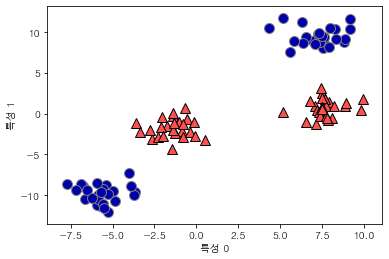

In [3]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1");

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

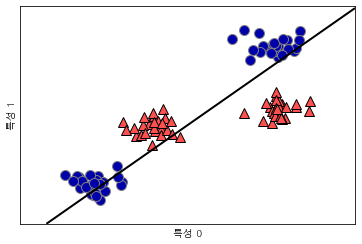

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

두 번째 특성(특성1을 제곱한 값)을 새로운 특성으로 추가해 입력 특성 확장  
(특성0, 특성1) 2차원 데이터 포인트 --> (특성0, 특성1, 특성1 제곱) 3차원 데이터 포인트

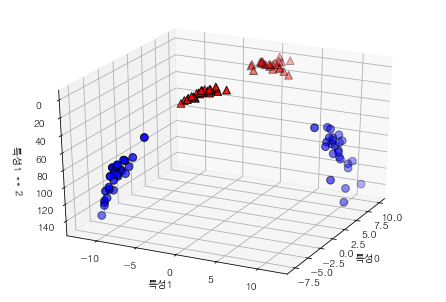

In [5]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev = -152, azim = -26)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2");

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


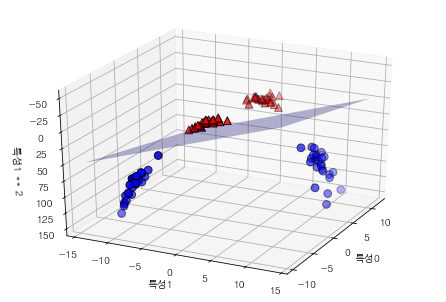

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2");

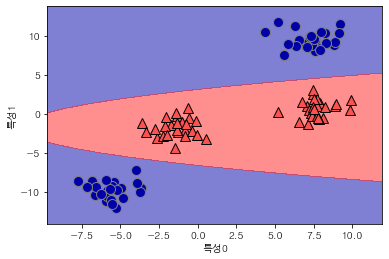

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1");

### 커널 기법

수학적 기교를 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있습니다.  
이를 커널 기법이라고 하며 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(정확히는 스칼라곱)를 계산합니다.

### SVM 이해하기

두 틀래스 사이의 경계에 위치한 데이터 포인트들을 **서포트 벡터**라고 합니다.  

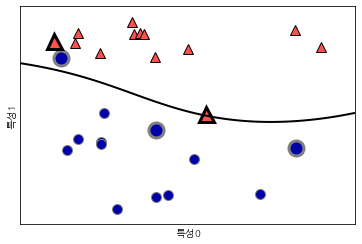

In [8]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("특성0")
plt.ylabel("특성1");

### SVM 매개변수 튜닝

**gamma** 매개변수는 γ로 가우시안 커널 폭의 역수에 해당합니다.  
하나의 훈련 샘플이 미치는 영향의 범위를 결정합니다.  
작은 값은 넓은 영역을 의미하며 큰 값이라면 영향이 미치는 범위가 제한적입니다.

**C** 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수입니다.  
각 포인트의 중요도(정확히는 dual_coef_ 값)을 제한합니다.

#### C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터

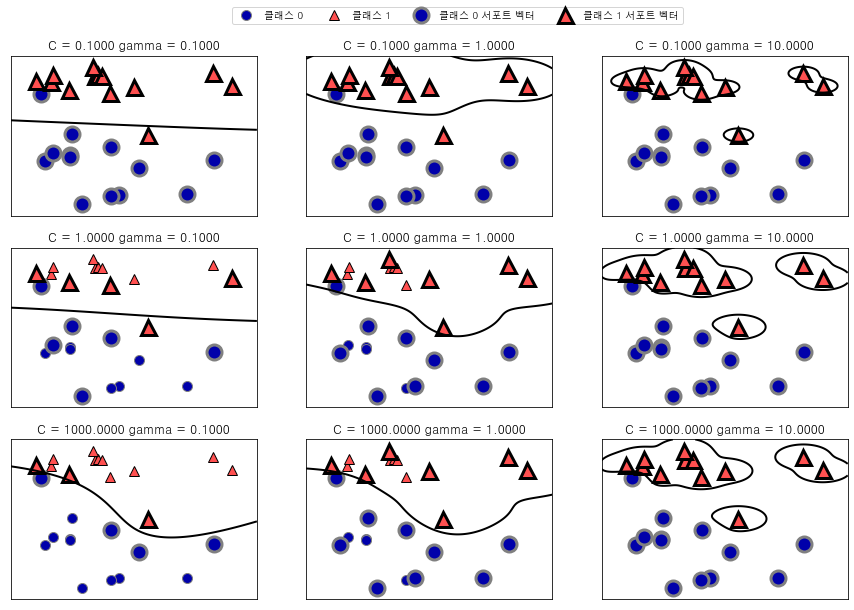

In [9]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, c in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = c, log_gamma = gamma, ax = a)
        
axes[0, 0].legend(["클래스 0", '클래스 1', "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"], ncol = 4, loc = (.9, 1.2));

**gamma**  
- 왼쪽 -> 오른쪽 : gamma 매개변수를 0.1에서 10으로 증가  
    (작은 gamma값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됩니다.)  
- 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해집니다.  
- 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춥니다. (<-> 큰 gamma값은 더 복잡한 모델을 만듦)

**C**  
- 위 -> 아래 : C 매개변수를 0.1에서 1000으로 증가  
    (선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작습니다.)  
- 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않습니다.  
- C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 합니다.

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


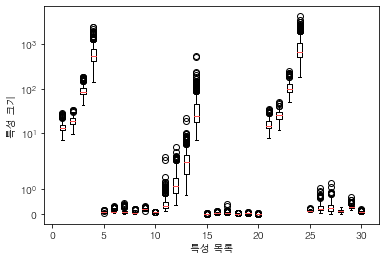

In [11]:
plt.boxplot(X_train, manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기");

### SVM을 위한 데이터 전처리

In [12]:
# 훈련 세트에서 특성별 퇴솟값 계산
min_on_training = X_train.min(axis = 0)

# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis = 0))
print("특성별 최댓값\n", X_train_scaled.max(axis = 0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [13]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다. (자세한 내용은 3장에 있습니다.)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [14]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.948
테스트 세트 정확도 : 0.951


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


매개변수 C나 gamma값을 증가시켜 조금 더 복잡한 모델

In [15]:
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 장단점과 매개변수

- 커널 서포트 벡터 머신은 강력한 모델이며 다양한 dataset에서 잘 작동  
- SVM은 데이터의 특성이 몇 개 안되더라도복잡한 결정 경계를 만들 수 있습니다.  

**단점**  
- 샘플이 많을 때는 잘 맞지 않습니다. -> 10만개의 샘플까지는 잘 작동하지만 그 이상의 dataset은.....  
- 데이터 전처리와 매개변수 설정에 신경을 많이 써야 합니다.  
- 분석하는 것도 어렵습니다.  
    (예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기도 난해)

**중요 매개변수**  
가장 중요한 것은 **규제 매개변수 C**와 어떤 커널을 사용할지와 각 커널에 따른 매개변수입니다.  
ex) RBF 커널 : gamma 매개변수